# Support Vector Machines

In [2]:
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

## Load a Simulated Dataset

array([[ 4.27268943e+00, -1.14040303e+00],
       [-5.68071351e-02,  1.99177588e+00],
       [-1.18128969e-02,  1.07076386e+00],
       ...,
       [-1.08414041e+00, -1.10750634e+01],
       [ 1.25518799e+01,  1.14801032e+00],
       [-8.76524670e+00,  8.05511932e+00]])

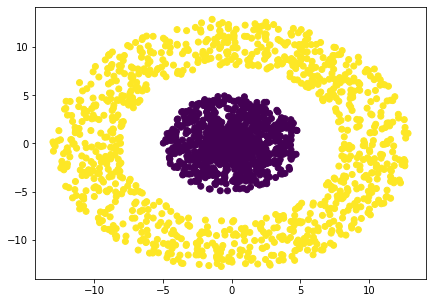

In [19]:
df = pd.read_csv('X1.csv')
X1 = df.values
plt.scatter(X1[:,0],X1[:,1],c=X1[:,2])
X=X1[:,0:2]
Y=X1[:,2]
Y=Y.astype(int)
X

array([[ -0.25112068,   3.87458548],
       [  0.44834896, -12.63780091],
       [  2.51445085,   5.00801543],
       ...,
       [ -1.73835965, -15.12286263],
       [  8.02697579, -11.29884323],
       [  8.99181732, -11.79273726]])

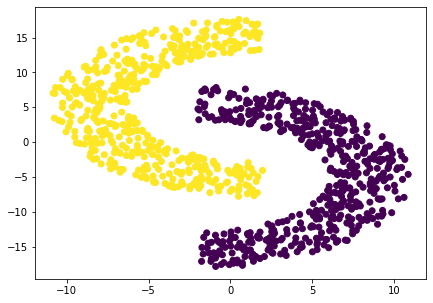

In [35]:
df = pd.read_csv('X2.csv')
X2 = df.values
plt.scatter(X2[:,0],X2[:,1],c=X2[:,2])
X=X2[:,0:2]
Y=X2[:,2]
Y=Y.astype(int)
X

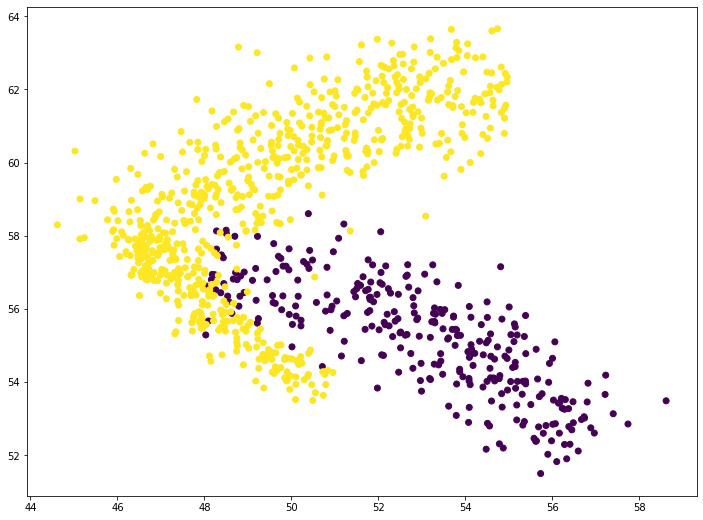

In [317]:
df = pd.read_csv('data/X.csv')
X = df.values
df = pd.read_csv('data/Y.csv')
Y = df.values
Y = Y.flatten()
plt.scatter(X[:, 0], X[:, 1], c=Y);

In this session, we will explore the above dataset with Support Vector Machines (SVMs). As tools of classification, SVMs will be used to predict the label of previously unseen points. Looking at the visulization of this dataset, we see that there are 2 clusters of data points (one in a boomerang shape on the left and another in a straight line that points into the boomerang). While there are these 2 clusters, there is significant overlap between them where they meet up. This overlap makes these datasets intereting for SVMs.

## Sklearn SVMs

Sklearn has a great library for SVMs. There are a number of different implementations of SVMs by Sklearn, and in this session we will be using Sklearn.svm.SVC. This is a good implementation because it is very flexible with the use of kernels and multiclass classification problems. It scales well for problems with up to 10,000 data points. SVC sets the default kernel to 'rbf' but we will begin by using a 'linear' kernel. More information on Sklearn.svm.SVC can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Additional information on classifiers provided in the Sklearn library can be found at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm and https://scikit-learn.org/stable/modules/svm.html#svm

## Initial SVM with Linear Kernel

Here we are loading all of our data into an SVM to see what decision boundary will be created. Usually, when creating an model it is important to partition the data in order to have some method for model validation, but in this case since we are using 2 dimensional data we will be able to visually inspect the decision boundary. Later on, when we use SVMs to make predictions, we will partition the data.

In [36]:
model = svm.SVC(kernel='linear')
print(X.shape)
print(Y.shape)
model.fit(X,Y)

(999, 2)
(999,)


SVC(kernel='linear')

The next cell of code shows the decision boundary formed by the model we just created.

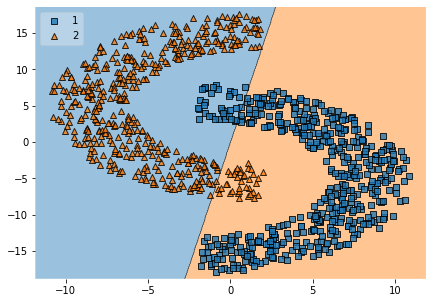

In [37]:
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

From the plot of the decision boundary above, we see that this model could greatly be improved if it had a nonlinear decision boundary. To do this, we will explore a few different kernels to see how they change the decision boundary.

## Kernels

Support Vector Machines (SVMs) are powerful tools for machine learning, and they become even more powerful when a kernel is used to define a more complex decision boundary. The Sklearn library provides a number of kernels that can be used in the SVC model we are using. We will have already seen a linear kernel, so now we will repeate the steps above using the following kernels
1. rbf (default kernel for SVC)
2. poly
3. sigmoid

Each type of kernel has different parameterizations based on its mathematical formulation. Additional information on the kernels used in sklearn can be found at https://scikit-learn.org/stable/modules/svm.html#svm-kernels

### Rbf Kernel
The rbf kernel uses the exponential function
<center> $exp(-\gamma\|X-X'\|)$
    
to measure the distance between the points $X$ and $X'.$ When viewing the decision boundary from the model below, vary the parameter gamma to see how it changes the decision boundary (gamma > 0).

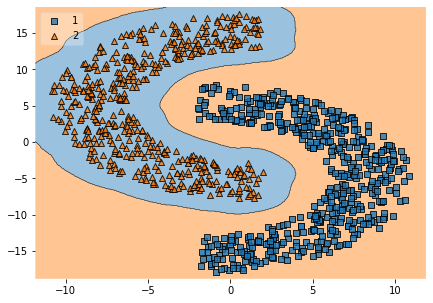

In [38]:
model = svm.SVC(kernel='rbf', gamma = 1)
model.fit(X,Y)
plt.rcParams['figure.figsize'] = [7, 5]
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

### Polynomial Kernel
The polynomial kernel uses the function 
<center>$(\gamma\langle X,X'\rangle+r)^d$
    
to measure the distance between the points $X$ and $X'.$ By default, $d$ will be set to 3, but this can be modified in the parameters of the model. Again, you can vary the parameters to see how it affects the decision boundary ($d$ is given as degree and $r$ is given as coef0).
    
Note: the run time scales with $d$

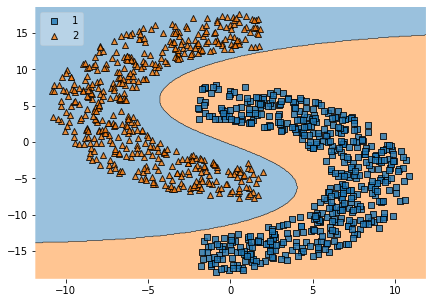

In [41]:
model = svm.SVC(kernel='poly', degree = 3, coef0 = 5)
model.fit(X,Y)
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

### Sigmoid Kernel

The sigmoid kernel uses the function
<center>$\tanh(\gamma\langle X,X'\rangle+r)$
    
to measure the distance between the points $X$ and $X'$

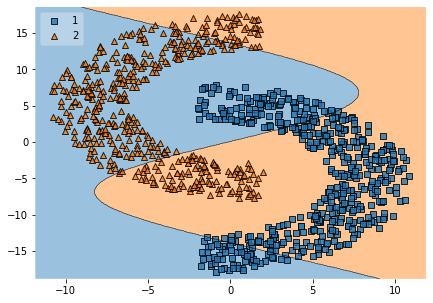

In [43]:
model = svm.SVC(kernel='sigmoid')
model.fit(X,Y)
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

The point of the above code is to give some intuition for how kernels impact a SVM and an understanding how why distance is such an important concept in machine learning. It is important to note that in the above code, we have only use 1 type of machine learning model, but we see that by varying the kernel we apply to the model we get varying results.

Typically, a kernel should NOT be selected by trying to visualize the decision boundary. This is impractical for datasets in higher dimensions, and it would discount the importance of having a validation method. Kernel selection should go through a process similar to the model validation process we have discussed.

## Multiclass Classification with SVMs

The 3 main types of machine learning problems are
1. Supervised learning (Classification)
2. Unsupervised learning (Clustering)
3. Reinforcement learning

So far we have seen a number of supervised learning or classification algorithms (neural networks, Naive Bayes, SVMs, etc.). Generally, these classification algorithms, and especially SVMs are used for binary classification problems. However, in many cases there are more than 2 classes in a supervised learning problem. In this section, we will cover the 2 main methods, one vs. rest and one vs. one, which are adaptations of binary classifiers for multiclass problems.

### One vs. One (OvO) Classification

Given a classification problem involving $K$ classes, $K(K-1)/2$ binary classifiers are created. Each of these binary classifiers is similar to the SVMs we have previously seen, and at training time, each classifier is passed all of the training examples from 2 classes and learns to distinguish between them (For a $K$ class problem, there are $K(K-1)/2$ pairs of classes). At testing time, given a new data point, all $K(K-1)/2$ classifiers are run on that point and vote to which class is should belong to. After the voting is complete, the model labels the test data as the class that had the highest number of votes. OvO classification is how the SVC model we have been using handles multiclass classification problems.

### One vs. Rest (OvR) Classification

One vs. Rest classification, also called One vs. All (OvA) or One Against All (OAA), is a method for a $K$ class classification problem where $K$ binary classifiers are trained to determine if a data point belongs to a class or not. At training time, each binary classifier is passed all of the training data where the samples of one class are positive and all other samples are negative (Each binary classifier will have a different class be positive). This method of partitinoing the training data causes each binary classifier to be trained on unbalanced data. Then at test time, the test data is passed to all binary classifiers and, similar to OvO classification, the binary classifiers vote for which class the test data belongs to.

### Voting Schemes

Both OvO and OvR classification schemes rely on binary classifiers to vote, and a potential issue that can arries here is ties in voting. In the case of OvO, if there is a tie, the model needs a method for breaking the tie. In OvR, since there is only 1 model that can vote for each class, if there is a tie, the tie will have values of either 1-1 or 0-0 (it could be a multiclass tie). To avoid this, each in OvR each binary classifier can give a confidence value for its vote, so in the case of a tie the model defaults to the binary classifier with the highest confidence. This method of confidence intervals is not perfect, and unbalanced training data can lead to variation in the scale of the confidence values.

## Iris Data Set

The Iris Data Set is a famous a popular data set for machine learning. The data set contains measurements from 150 flowers belonging to 3 different species of Iris flowers (50 flowers per species). This data set was introduced in 1936 by Robert Fisher and remains a popular data set for practicing multiclass classification problems. For each flower, the dataset contains the features:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   
While this data set is 4 dimensional, it is known that 1 of the classes is linearly separable from the other 2, but the other 2 are not linearly separable from each other. This makes it interesting for applying our new knowledge of Kernels. The goal is to use these features to classify a flower as belonging to 1 of these 3 species:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

<!DOCTYPE html>
<html>

<body>
<div class="row">
  <div class="column">
    <img src="imgs/iris_setosa.jpg" alt="Snow" style="width: 200px">
    <center>Iris Setosa</center>
  </div>
  <div class="column">
    <img src="imgs/iris_versicolour.jpg" alt="Forest" style="width: 200px">
    <center>Iris Versicolour</center>
  </div>
  <div class="column">
    <img src="imgs/iris_virginica.jpg" alt="Mountains" style="width: 200px">
    <center>Iris Virginica</center>
  </div>
</div>

</body>
</html>

### Load Iris Data

In [312]:
df = pd.read_csv('data/iris.data')
X_df = df.iloc[:,0:4]
X = X_df.to_numpy()
Y_df = df.iloc[:,4:5]
Y = np.zeros((150,))
counter = 0
while counter < 150:
    if counter < 50:
        Y[counter] = 1
    elif counter < 100:
        Y[counter] = 2
    else:
        Y[counter] = 3
    counter = counter + 1
Y = Y.astype(int)
data_train, data_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.60)

### Explore the Data Set
Since this data is 4 dimensional, there is no simple way to visualize it in the plane. However, we are able to project the 4D data into 2D to visualize it. By changing the indecies in the scatter plot below, we can visualize the data projected into different dimensions.

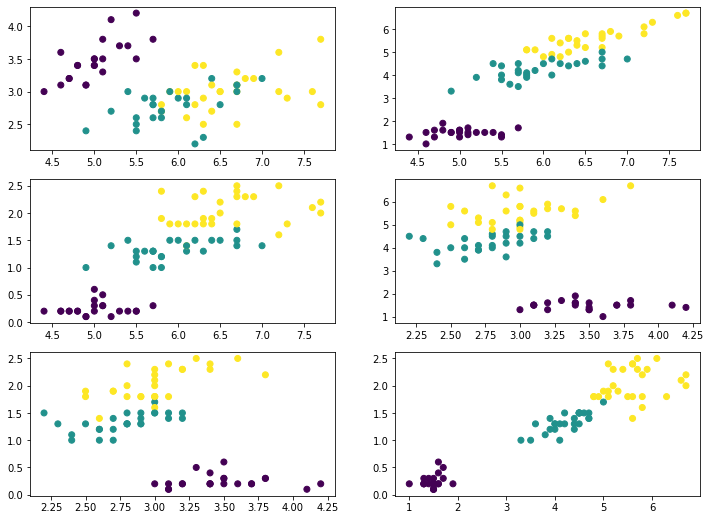

In [287]:
plt.rcParams['figure.figsize'] = [12, 9]
fig, axs = plt.subplots(3,2)
axs[0,0].scatter(data_train[:, 0], data_train[:, 1], c=labels_train)
axs[0,1].scatter(data_train[:, 0], data_train[:, 2], c=labels_train)
axs[1,0].scatter(data_train[:, 0], data_train[:, 3], c=labels_train)
axs[1,1].scatter(data_train[:, 1], data_train[:, 2], c=labels_train)
axs[2,0].scatter(data_train[:, 1], data_train[:, 3], c=labels_train)
axs[2,1].scatter(data_train[:, 2], data_train[:, 3], c=labels_train)

### Explore Different SVM Models for Multiclass Classification with Kernels
One method to explore how to develope the best classifier is to find a classifier that performes well at seperating these 3 classes in each of the 6 above projections. In the cell below, we have defined a function to test out a classifier in each of projection and plot th decision boudaries, similar to what we did when exploring the different types of kernel functions and their parameters. While this is not a foolproof method for model selection, generally if a single model preforms well in all projections of the feature space, then it will preform well when the entire feature space is used, and if a model doesn't preform well in any of the projections, then it is likely not going to work well when the entire feature space is used.

Note: This type of experiment will only work because the feature space is 4D. As we saw above, there are only 6 projections from 4D to 2D, so we are able to view them all. However, as the size of the feature space grows, the number of projections will grow very quickly. (In an $n-$dimensional feature space, the number of projections is equal to the number of pairs of features, which is given by $n$ choose 2 or $\binom{n}{2}=\frac{n!}{2!(n-2)!}$).

In [288]:
def plot_projections(model, X, y):
    # Set the plotting parameters so we can see all 6 projections
    fig, axes = plt.subplots(3, 2, figsize=(12, 10))
    # Count which number chart we have made
    chart = 0
    # Outter is used to iterate over 1 of the features we will be using for the projection
    outter = 0
    while outter < 4:
        # Inner is used to iterate over the 2nd feature we will be using for the projection
        inner = outter + 1
        while inner < 4:
            # Project the feature space to only the features defined by the outter and inner counters
            X_temp = np.array([X[:,outter], X[:,inner]]).T
            # Fit the model to this data projection
            model.fit(X_temp, y)            
            # Plot the decision boundaries of the model for this given projection
            fig = plot_decision_regions(X_temp, y, clf=model, ax=axes[int(np.floor(chart/2))][int(chart%2)], legend=2)
            # Increment the chart counter and the counters used to select which features are used in the projection
            chart = chart + 1
            inner = inner + 1
        outter = outter + 1

Now that we have defined the above function, in the next cell, we can pass a model and the Iris data into the function to visualize how well our model works in each projection. You should try a variety of kernel functions and parameters to see which are effective.

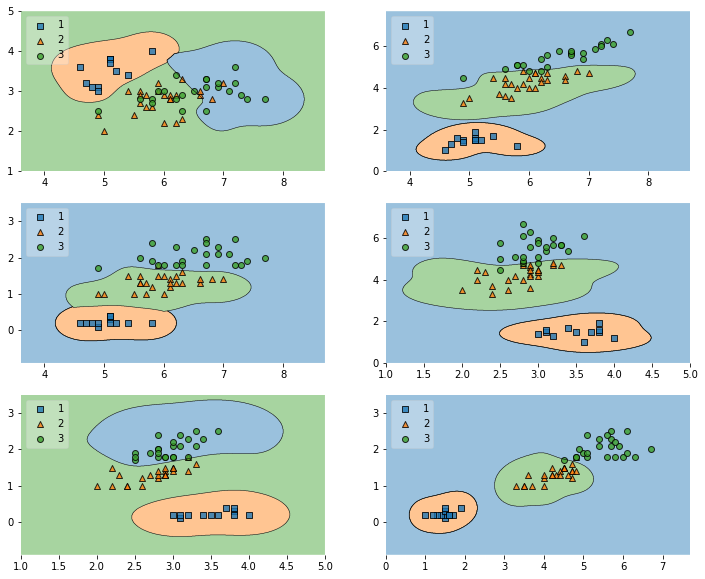

In [314]:
model = svm.SVC(kernel='rbf', gamma=5)
plot_projections(model, data_train, labels_train)

### Model Validation

Now that we have learned a little about SVMs, kernels, and multiclass classification, it is time to preform model validation and testing. So far, we have only been exposed to the training data, but our goal is to develope a model that will generalize well to the remaining data from the Iris data set. To do this, we will preform cross validation on a model that preformed well in the previous section.

In [307]:
def k_fold_cross_validation(X, y, k, model):
    # This is a function that we will use to split the data into training and validation sets
    skf = StratifiedKFold(n_splits=k)
    for train_indices, test_indices in skf.split(X,y):
        X_train, X_test = X[train_indices], X[test_indices]
        Y_train, Y_test = y[train_indices], y[test_indices]
        model.fit(X_train, Y_train)
        predictions=model.predict(X_test)
        print(predictions)
        confusion_mat=metrics.confusion_matrix(Y_test, predictions, labels = [1, 2, 3])
        print(confusion_mat)

In [313]:
model = svm.SVC(kernel='rbf', gamma=10)
k_fold_cross_validation(data_train, labels_train, 6, model)

[3 3 2 2 2 3 3 1 2 3]
[[1 0 1]
 [0 4 0]
 [0 0 4]]
[3 2 2 2 1 3 3 3 3 2]
[[1 0 1]
 [0 4 0]
 [0 0 4]]
[2 2 2 3 3 1 1 2 2 2]
[[2 0 0]
 [0 4 0]
 [0 2 2]]
[1 3 3 2 3 1 2 2 2 2]
[[2 0 0]
 [0 4 0]
 [0 1 3]]
[3 2 2 3 2 3 3 1 3 3]
[[1 0 1]
 [0 3 1]
 [0 0 4]]
[3 3 3 3 2 2 3 3 1 2]
[[1 0 1]
 [0 3 2]
 [0 0 3]]
